# Определение перспективного тарифа для телеком компании

### Тариф «Смарт»

Ежемесячная плата: 550 рублей;
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика;
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля;
сообщение: 3 рубля;
1 Гб интернет-трафика: 200 рублей.

### Тариф «Ультра»

Ежемесячная плата: 1950 рублей;
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика;
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль;
сообщение: 1 рубль;
1 Гб интернет-трафика: 150 рублей.

## План:

### Шаг 1. Открытие файлов с данными и изучение общей информации
файлы:  
calls.csv  
internet.csv  
messages.csv  
tariffs.csv   
users.csv  

### Шаг 2. Подготовка и предобработка данных
Приведение данных к нужным типам;
Нахождение и исправление ошибок в данных.
Пояснение, какие ошибки найдены и как исправлены. 
Подсчёт для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (за вычетом бесплатного лимита из суммарного количества звонков, сообщений и интернет-трафика).

### Шаг 3.Анализ и визуализация данных
Описание поведения клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Подсчёт среднего количества, дисперсии и стандартного отклонения. Построение гистограммы. Описание распределения.

### Шаг 4. Проверка и анализ гипотез
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается  
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Шаг 5. Общий вывод

## Описание данных

### Таблица users (информация о пользователях):  
user_id — уникальный идентификатор пользователя  
first_name — имя пользователя  
last_name — фамилия пользователя  
age — возраст пользователя (годы)  
reg_date — дата подключения тарифа (день, месяц, год)  
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)   
city — город проживания пользователя  
tariff — название тарифного плана  

### Таблица calls (информация о звонках):  
id — уникальный номер звонка  
call_date — дата звонка  
duration — длительность звонка в минутах  
user_id — идентификатор пользователя, сделавшего звонок 

### Таблица messages (информация о сообщениях):  
id — уникальный номер сообщения  
message_date — дата сообщения  
user_id — идентификатор пользователя, отправившего сообщение  

### Таблица internet (информация об интернет-сессиях):  
id — уникальный номер сессии  
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
session_date — дата интернет-сессии  
user_id — идентификатор пользователя  

### Таблица tariffs (информация о тарифах):  
tariff_name — название тарифа  
rub_monthly_fee — ежемесячная абонентская плата в рублях  
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
messages_included — количество сообщений в месяц, включённых в абонентскую плату  
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

## Шаг 1. Открытие файлов с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

### Таблица users

In [2]:
users = pd.read_csv('users.csv')
print(users.info())
print(users.duplicated().sum())
users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 35.2+ KB
None
0


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Пропуски в столбце 'churn_date' связаны с тем, что пользователи пользуются тарифом по сей день. В остальных столбцах пропуски отсутствуют. Выбросы также отсутствуют. Дупликаты отсутствуют.

### Таблица calls

In [3]:
calls = pd.read_csv('calls.csv')
print(calls.info())
print(calls.duplicated().sum())
calls.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 7.7+ MB
None
0


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


В столбце duration найдены выбросы - значения 0.00, требуется предобработка. Пропуски не найдены. Дупликаты также не найдены.

### Таблица messages

In [4]:
messages = pd.read_csv('messages.csv')
print(messages.info())
print(messages.duplicated().sum())
messages.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.8+ MB
None
0


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Пропущенные значения отсутствуют. Выбросы отсутствуют. Дупликаты отсутствуют.

### Таблица internet

In [5]:
internet = pd.read_csv('internet.csv')
print(internet.info())
print(internet.duplicated().sum())
internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 6.8+ MB
None
0


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Пропущенные значения отсутствуют. Выбросы отсутствуют. Дупликаты отсутствуют.

### Таблица tariffs

In [6]:
tariffs = pd.read_csv('tariffs.csv')
print(tariffs.info())
print(tariffs.duplicated().sum())
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 144.0+ bytes
None
0


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Шаг 2. Подготовка и предобработка данных

### Преобразования типа данных object в datetime

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Преобразование столбца 'duration' таблицы calls

Значение 0.00 в столбце 'duration' скорее всегоз значит то, что абонент звонил, но разговор не начался, а значит абонентская плата не снимается. Нету смысла держать значения 0.00, посколько для анализа выручки, это не понадобится. Замечу, что значения звонков менее 2 секунд выглядят очень подозрительными, такое значение длительности подозрительно даже в случае холодных звонков.

кол-во выбросов 0.00: 39613
процент выбросов 0.00: 19.6%


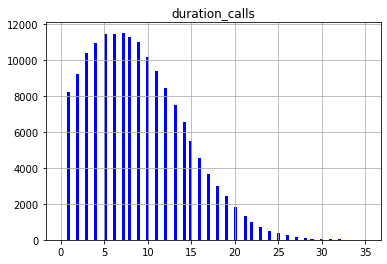

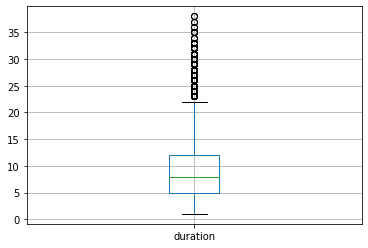

In [8]:
print('кол-во выбросов 0.00:{: .0f}'.format(calls[calls['duration'] == 0.00]['duration'].count()))
print('процент выбросов 0.00:{: .1%}'.format(calls[calls['duration'] == 0.00]['duration'].count() / calls['duration'].count()))
calls = calls[calls['duration'] >= 0.03]
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls['duration'].hist(bins=100, range=(0, 35), color='b')
plt.title('duration_calls')
plt.show()
calls.boxplot(column='duration')
plt.show()

### Тариф 

In [9]:
user_month_tariffs = users[['user_id', 'tariff']]

### Количество сделанных звонков('user_month_calls_count')

In [10]:
calls['month'] = calls['call_date'].dt.month
user_month_calls_count = calls.pivot_table(index='user_id', columns='month', values='id', aggfunc='count')
user_month_calls_count = user_month_calls_count.merge(user_month_tariffs, on='user_id', how='outer')
user_month_calls_count.columns = [
    'user_id', '1_cal', '2_cal', '3_cal', '4_cal', '5_cal', '6_cal', '7_cal', '8_cal', '9_cal', '10_cal', '11_cal', '12_cal',
    'tariff'
]
user_month_calls_count[[
    '1_cal', '2_cal', '3_cal', '4_cal', '5_cal', '6_cal', '7_cal', '8_cal', '9_cal', '10_cal', '11_cal', '12_cal'
]] = user_month_calls_count[[
    '1_cal', '2_cal', '3_cal', '4_cal', '5_cal', '6_cal', '7_cal', '8_cal', '9_cal', '10_cal', '11_cal', '12_cal'
]].fillna(0)
user_month_calls_count[[
    '1_cal', '2_cal', '3_cal', '4_cal', '5_cal', '6_cal', '7_cal', '8_cal', '9_cal', '10_cal', '11_cal', '12_cal'
]] = user_month_calls_count[[
    '1_cal', '2_cal', '3_cal', '4_cal', '5_cal', '6_cal', '7_cal', '8_cal', '9_cal', '10_cal', '11_cal', '12_cal'
]].astype('int')

### Количество израсходованных минут разговора по месяцам(user_month_minute_sum)

In [11]:
user_month_minute_sum = calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum')
user_month_minute_sum = user_month_minute_sum.merge(user_month_tariffs, on='user_id', how='outer')
user_month_minute_sum.columns = [
    'user_id', '1_min', '2_min', '3_min', '4_min', '5_min', '6_min', '7_min', '8_min', '9_min', '10_min', '11_min', '12_min',
    'tariff'
]
user_month_minute_sum[[
    '1_min', '2_min', '3_min', '4_min', '5_min', '6_min', '7_min', '8_min', '9_min', '10_min', '11_min', '12_min'
]] = user_month_minute_sum[[
    '1_min', '2_min', '3_min', '4_min', '5_min', '6_min', '7_min', '8_min', '9_min', '10_min', '11_min', '12_min'
]].fillna(0)
user_month_minute_sum[[
    '1_min', '2_min', '3_min', '4_min', '5_min', '6_min', '7_min', '8_min', '9_min', '10_min', '11_min', '12_min'
]] = user_month_minute_sum[[
    '1_min', '2_min', '3_min', '4_min', '5_min', '6_min', '7_min', '8_min', '9_min', '10_min', '11_min', '12_min'
]].astype('int')

### Количество отправленных сообщений по месяцам(user_month_messages_count)

In [12]:
messages['month'] = messages['message_date'].dt.month
user_month_messages_count = messages.pivot_table(index='user_id', columns='month', values='id', aggfunc='count')
user_month_messages_count = user_month_messages_count.merge(user_month_tariffs, on='user_id', how='outer')
user_month_messages_count.columns = [
    'user_id', '1_mes', '2_mes', '3_mes', '4_mes', '5_mes', '6_mes', '7_mes', '8_mes', '9_mes', '10_mes', '11_mes', '12_mes',
    'tariff'
]
user_month_messages_count[[
    '1_mes', '2_mes', '3_mes', '4_mes', '5_mes', '6_mes', '7_mes', '8_mes', '9_mes', '10_mes', '11_mes', '12_mes'
]] = user_month_messages_count[[
    '1_mes', '2_mes', '3_mes', '4_mes', '5_mes', '6_mes', '7_mes', '8_mes', '9_mes', '10_mes', '11_mes', '12_mes'
]].fillna(0)
user_month_messages_count[[
    '1_mes', '2_mes', '3_mes', '4_mes', '5_mes', '6_mes', '7_mes', '8_mes', '9_mes', '10_mes', '11_mes', '12_mes'
]] = user_month_messages_count[[
    '1_mes', '2_mes', '3_mes', '4_mes', '5_mes', '6_mes', '7_mes', '8_mes', '9_mes', '10_mes', '11_mes', '12_mes'
]].astype('int')

### Объем израсходованного интернет-трафика по месяцам(user_month_internet_sum)

In [13]:
internet['month'] = internet['session_date'].dt.month
user_month_internet_sum = internet.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum')
user_month_internet_sum = user_month_internet_sum.merge(user_month_tariffs, on='user_id', how='outer')
user_month_internet_sum.columns = [
    'user_id', '1_int', '2_int', '3_int', '4_int', '5_int', '6_int', '7_int', '8_int', '9_int', '10_int', '11_int', '12_int',
    'tariff'
]
user_month_internet_sum[[
    '1_int', '2_int', '3_int', '4_int', '5_int', '6_int', '7_int', '8_int', '9_int', '10_int', '11_int', '12_int'
]] = user_month_internet_sum[[
    '1_int', '2_int', '3_int', '4_int', '5_int', '6_int', '7_int', '8_int', '9_int', '10_int', '11_int', '12_int'
]].fillna(0)
user_month_internet_sum[[
    '1_int', '2_int', '3_int', '4_int', '5_int', '6_int', '7_int', '8_int', '9_int', '10_int', '11_int', '12_int'
]] = user_month_internet_sum[[
    '1_int', '2_int', '3_int', '4_int', '5_int', '6_int', '7_int', '8_int', '9_int', '10_int', '11_int', '12_int'
]].astype('int')

## Помесячная выручка с каждого пользователя

### Таблица переплат по разговорам по телефону в минутах(user_month_minute_over)

In [14]:
for i in range(13):
    if (i != 0):
        def minute_over(row):
            minute = row[i]
            if (row[i] == 0):
                return -1
            tariff = row[13]
            if (tariff == 'smart'):
                minute = 500 - minute
            elif (tariff == 'ultra'):
                minute = 3000 - minute
            if (minute < 0):
                minute = (-1) * minute
            elif (minute >= 0):
                minute = 0
            return minute
    if (i == 1):
        user_month_minute_sum['1_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 2):
        user_month_minute_sum['2_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 3):
        user_month_minute_sum['3_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 4):
        user_month_minute_sum['4_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 5):
        user_month_minute_sum['5_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 6):
        user_month_minute_sum['6_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 7):
        user_month_minute_sum['7_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 8):
        user_month_minute_sum['8_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 9):
        user_month_minute_sum['9_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 10):
        user_month_minute_sum['10_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 11):
        user_month_minute_sum['11_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)
    if (i == 12):
        user_month_minute_sum['12_min_over'] = user_month_minute_sum.apply(minute_over, axis=1)

user_month_minute_over = user_month_minute_sum[[
    'user_id', 'tariff', '1_min_over', '2_min_over', '3_min_over', '4_min_over', '5_min_over', '6_min_over', '7_min_over',
    '8_min_over', '9_min_over', '10_min_over', '11_min_over', '12_min_over'
]]

### Таблица переплат по количеству отправленных смс(user_month_messages_over)

In [15]:
for i in range(13):
    if (i != 0):
        def message_over(row):
            message = row[i]
            if (row[i] == 0):
                return -1
            tariff = row[13]
            if (tariff == 'smart'):
                message = 50 - message
            elif (tariff == 'ultra'):
                message = 1000 - message
            if (message < 0):
                message = (-1) * message
            elif (message >= 0):
                message = 0
            return message
    if (i == 1):
        user_month_messages_count['1_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 2):
        user_month_messages_count['2_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 3):
        user_month_messages_count['3_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 4):
        user_month_messages_count['4_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 5):
        user_month_messages_count['5_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 6):
        user_month_messages_count['6_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 7):
        user_month_messages_count['7_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 8):
        user_month_messages_count['8_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 9):
        user_month_messages_count['9_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 10):
        user_month_messages_count['10_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 11):
        user_month_messages_count['11_mes_over'] = user_month_messages_count.apply(message_over, axis=1)
    if (i == 12):
        user_month_messages_count['12_mes_over'] = user_month_messages_count.apply(message_over, axis=1)

user_month_messages_over = user_month_messages_count[[
    'user_id', 'tariff', '1_mes_over', '2_mes_over', '3_mes_over', '4_mes_over', '5_mes_over', '6_mes_over', '7_mes_over',
    '8_mes_over', '9_mes_over', '10_mes_over', '11_mes_over', '12_mes_over'
]]

### Таблица переплат по объёму интернет трафика(user_month_internet_over)

In [16]:
for i in range(13):
    if (i != 0):
        def internet_over(row):
            if (row[i] == 0):
                return -1
            internet = row[i] / 1024
            internet_trunc = row[i]
            tariff = row[13]
            if (tariff == 'smart'):
                internet = 15 - internet
            elif (tariff == 'ultra'):
                internet = 30 - internet
            if (internet < 0):
                internet = (-1) * internet
                return int(internet)
            elif (internet >= 0):
                internet = 0
                return internet
    if (i == 1):
        user_month_internet_sum['1_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 2):
        user_month_internet_sum['2_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 3):
        user_month_internet_sum['3_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 4):
        user_month_internet_sum['4_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 5):
        user_month_internet_sum['5_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 6):
        user_month_internet_sum['6_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 7):
        user_month_internet_sum['7_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 8):
        user_month_internet_sum['8_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 9):
        user_month_internet_sum['9_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 10):
        user_month_internet_sum['10_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 11):
        user_month_internet_sum['11_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)
    if (i == 12):
        user_month_internet_sum['12_int_over'] = user_month_internet_sum.apply(internet_over, axis=1)

user_month_internet_over = user_month_internet_sum[[
    'user_id', 'tariff', '1_int_over', '2_int_over', '3_int_over', '4_int_over', '5_int_over', '6_int_over', '7_int_over',
    '8_int_over', '9_int_over', '10_int_over', '11_int_over', '12_int_over'
]]

### Объединение таблиц с переплатами(user_month_info_over)

In [17]:
user_month_info_over = user_month_minute_over.merge(user_month_messages_over, on=['user_id', 'tariff'], how='outer')
user_month_info_over = user_month_info_over.merge(user_month_internet_over, on=['user_id', 'tariff'], how='outer')

### Таблица с общей выручкой по месяцам для каждого пользователя(user_month_avenue)

In [18]:
for i in range(14):
    if (i >= 2):
        def avenue(row):
            avenue_min = row[i]
            avenue_mes = row[i + 12]
            avenue_int = row[i + 24]
            if ((avenue_min == -1) and (avenue_mes == -1) and (avenue_int == -1)):
                return -1
            else:
                if (row[1] == 'smart'):
                    return 550 + 3 * avenue_min + 3 * avenue_mes + 200 * avenue_int
                elif (row[1] == 'ultra'):
                    return 1950 + 1 * avenue_min + 1 * avenue_mes + 150 * avenue_int

    if (i == 2):
        user_month_info_over['1_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 3):
        user_month_info_over['2_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 4):
        user_month_info_over['3_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 5):
        user_month_info_over['4_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 6):
        user_month_info_over['5_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 7):
        user_month_info_over['6_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 8):
        user_month_info_over['7_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 9):
        user_month_info_over['8_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 10):
        user_month_info_over['9_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 11):
        user_month_info_over['10_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 12):
        user_month_info_over['11_avenue'] = user_month_info_over.apply(avenue, axis=1)
    if (i == 13):
        user_month_info_over['12_avenue'] = user_month_info_over.apply(avenue, axis=1)
        
user_month_avenue = user_month_info_over[[
    'user_id', 'tariff', '1_avenue', '2_avenue', '3_avenue', '4_avenue', '5_avenue', '6_avenue', '7_avenue', '8_avenue',
    '9_avenue', '10_avenue', '11_avenue', '12_avenue'
]]
user_month_avenue = user_month_avenue.merge(
    users, on=['user_id', 'tariff'], how='outer')
user_month_avenue = user_month_avenue[[
    'user_id', 'tariff', '1_avenue', '2_avenue', '3_avenue', '4_avenue', '5_avenue', '6_avenue', '7_avenue', '8_avenue',
    '9_avenue', '10_avenue', '11_avenue', '12_avenue', 'city'
]]

In [19]:
user_month_minute_sum = user_month_minute_sum[[
    'user_id', '1_min', '2_min', '3_min', '4_min', '5_min', '6_min', '7_min', '8_min', '9_min', '10_min', '11_min', '12_min',
    'tariff'
]]
user_month_messages_count = user_month_messages_count[[
    'user_id', '1_mes', '2_mes', '3_mes', '4_mes', '5_mes', '6_mes', '7_mes', '8_mes', '9_mes', '10_mes', '11_mes', '12_mes',
    'tariff'
]]
user_month_internet_sum = user_month_internet_sum[[
    'user_id', '1_int', '2_int', '3_int', '4_int', '5_int', '6_int', '7_int', '8_int', '9_int', '10_int', '11_int', '12_int',
    'tariff'
]]

### Добавление среднего по месяцам в таблицы 

In [20]:
def mean(row):
    n = 0
    summ = 0
    for i in range(13):
        if (i != 0):
            if (row[i] != 0):
                n += 1
                summ += row[i]
    if ((summ != 0) and (n != 0)):
        return summ / n


user_month_minute_sum['mean_min'] = user_month_minute_sum.apply(mean, axis=1)
user_month_messages_count['mean_mes'] = user_month_messages_count.apply(mean, axis=1)
user_month_internet_sum['mean_int'] = user_month_internet_sum.apply(mean, axis=1)

In [21]:
def mean(row):
    n = 0
    summ = 0
    for i in range(14):
        if (i >= 2):
            if (row[i] != -1):
                n += 1
                summ += row[i]
    if ((summ != 0) and (n != 0)):
        return summ / n


user_month_avenue['mean_avenue'] = user_month_avenue.apply(mean, axis=1)
user_month_avenue = user_month_avenue.dropna()

### Таблицы

####  user_month_minute_sum - таблица количества потраченных минут
####  user_month_messages_count - таблица количества отправленных сообщений
####  user_month_internet_sum - таблица объема затраченного интернет трафика
####  user_month_avenue - таблица с выручкой

## Шаг 3. Анализ и визуализация данных

### Анализ количества потраченных минут

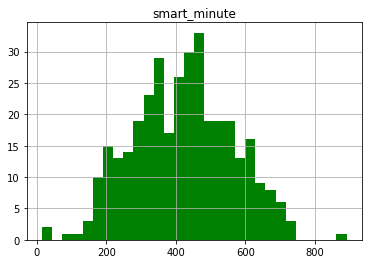

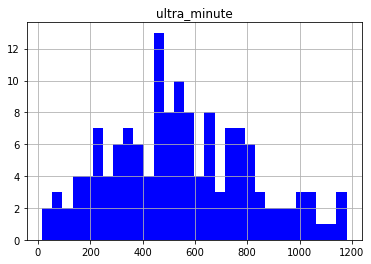

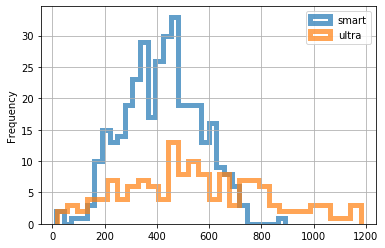

Среднее значение потраченных минут "smart": 420.7876549986149
Дисперсия потраченных минут "smart": 20571.524007032087
Среднее кв. отклонение "smart: 143.22213450500425

Среднее значение потраченных минут "ultra": 546.94241541287
Дисперсия потраченных минут "ultra": 71855.32402289227
Среднее кв. отклонение "ultra": 267.11952238560815


In [22]:
plt.title('smart_minute')
user_month_minute_sum[user_month_minute_sum['tariff'] == 'smart']['mean_min'].hist(
    bins=30, label='smart_minute', grid=True, color='g'
)
plt.show()
plt.title('ultra_minute')
user_month_minute_sum[user_month_minute_sum['tariff'] == 'ultra']['mean_min'].hist(
    bins=30, label='ultra_minute', grid=True, color='b'
)
plt.show()
ax1 = user_month_minute_sum[user_month_minute_sum['tariff'] == 'smart'].plot(
    kind='hist', histtype='step', bins=30, y='mean_min', label='smart', alpha=0.7, linewidth=5
)
user_month_minute_sum[user_month_minute_sum['tariff'] == 'ultra'].plot(
    kind='hist', histtype='step', bins=30, y='mean_min', ax=ax1, label='ultra', alpha=0.7, linewidth=5,
    legend=True, grid=True
)
plt.show()

print(
    'Среднее значение потраченных минут "smart":', user_month_minute_sum[
        user_month_minute_sum['tariff'] == 'smart']['mean_min'].mean()
)
print(
    'Дисперсия потраченных минут "smart":', np.var(
        user_month_minute_sum[user_month_minute_sum['tariff'] == 'smart']['mean_min'], ddof=1)
)
print(
    'Среднее кв. отклонение "smart:', np.std(user_month_minute_sum[user_month_minute_sum['tariff'] == 'smart']['mean_min'])
)

print()

print(
    'Среднее значение потраченных минут "ultra":', user_month_minute_sum[
        user_month_minute_sum['tariff'] == 'ultra']['mean_min'].mean()
)
print(
    'Дисперсия потраченных минут "ultra":', np.var(
        user_month_minute_sum[user_month_minute_sum['tariff'] == 'ultra']['mean_min'], ddof=1)
)
print(
    'Среднее кв. отклонение "ultra":',
    np.std( user_month_minute_sum[user_month_minute_sum['tariff'] == 'ultra']['mean_min'])
)

Среднее значение кол-ва потраченных минут в случае тарифа "smart" - около 400 минут, в случае тарифа "ultra" - около 520 минут, но по тарифному пакету доступно - до 500 минут в случае тарифа "smart" и до 3000 минут в случае тарифа "ultra". В случае тарифа "smart" среднее квадратичное отклонение - около 135 минут, то есть основные значения лежат в диапазоне [265, 535] минут, некоторым абонентам всё-таки удается превысить норму тарифного пакета, в случае же тарифного плана - "ultra" среднее квадратичное отклонение получилось около 250 минут, то есть основные значения лежат в диапазоне [270, 770] минут, это намного ниже нормы, но при этом среднее значение лежит выше границы тарифа "smart", поэтому пользователи и берут тариф с большим количеством пороговых минут.

### Анализ количества отправленных сообщений

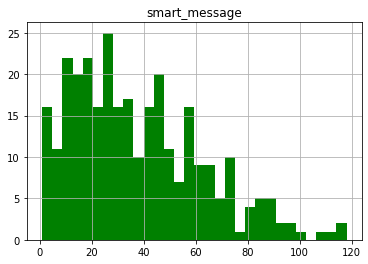

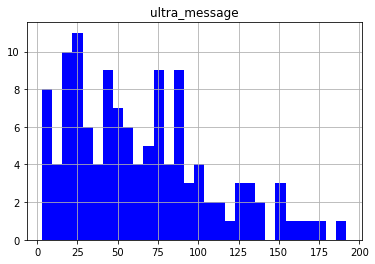

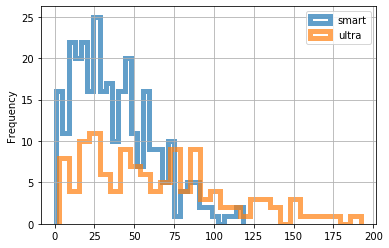

Среднее значение количества отправленных сообщений "smart": 37.57560563057252
Дисперсия количества отправленных сообщений "smart": 617.5094965861844
Среднее кв. отклонение "smart": 24.808562295179055

Среднее значение количества отправленных сообщений "ultra": 64.55580197132616
Дисперсия количества отправленных сообщений "ultra": 1882.7452175564713
Среднее кв. отклонение "ultra": 43.21529576877415


In [23]:
plt.title('smart_message')
user_month_messages_count[user_month_messages_count['tariff'] == 'smart']['mean_mes'].hist(
    bins=30, label='smart_message', grid=True, color='g'
)
plt.show()
plt.title('ultra_message')
user_month_messages_count[user_month_messages_count['tariff'] == 'ultra']['mean_mes'].hist(
    bins=30, label='ultra_message', grid=True, color='b'
)
plt.show()
ax2 = user_month_messages_count[user_month_messages_count['tariff'] == 'smart'].plot(
    kind='hist', histtype='step', bins=30, y='mean_mes', label='smart', alpha=0.7, linewidth=5
)
user_month_messages_count[user_month_messages_count['tariff'] == 'ultra'].plot(
    kind='hist', histtype='step', bins=30, y='mean_mes', label='ultra', ax=ax2, alpha=0.7, linewidth=5,
    grid=True, legend=True
)
plt.show()
print(
    'Среднее значение количества отправленных сообщений "smart":', user_month_messages_count[
        user_month_messages_count['tariff'] == 'smart']['mean_mes'].mean()
)
print(
    'Дисперсия количества отправленных сообщений "smart":', np.var(
        user_month_messages_count[user_month_messages_count['tariff'] == 'smart']['mean_mes'], ddof=1)
)
print(
    'Среднее кв. отклонение "smart":',
    np.std(user_month_messages_count[user_month_messages_count['tariff'] == 'smart']['mean_mes'])
)

print()

print(
    'Среднее значение количества отправленных сообщений "ultra":', user_month_messages_count[
        user_month_messages_count['tariff'] == 'ultra']['mean_mes'].mean()
)
print(
    'Дисперсия количества отправленных сообщений "ultra":', np.var(
        user_month_messages_count[user_month_messages_count['tariff'] == 'ultra']['mean_mes'], ddof=1)
)
print(
    'Среднее кв. отклонение "ultra":',
    np.std(user_month_messages_count[user_month_messages_count['tariff'] == 'ultra']['mean_mes'])
)

Среднее значение кол-ва отправленных сообщений в случае тарифа "smart" - около 38, в случае тарифа "ultra" - около 65, но по тарифному пакету доступно - до 50 сообщений в случае тарифа "smart" и до 1000 сообщений в случае тарифа "ultra". В случае тарифа "smart" среднее квадратичное отклонение - около 25 сообщений, то есть основные значения лежат в диапазоне [13, 63], как и в случае с количеством потраченных минут, по количеству сообщений, некоторым абонентам удается превысить норму тарифного пакета, в случае же тарифного плана - "ultra" среднее квадратичное отклонение получилось около 43 сообщений, то есть основные значения лежат в диапазоне [22, 108] сообщений, это намного ниже нормы, но при этом среднее значение лежит около границы тарифа "smart".

### Тариф "smart", анализ объема потраченного интернет трафика

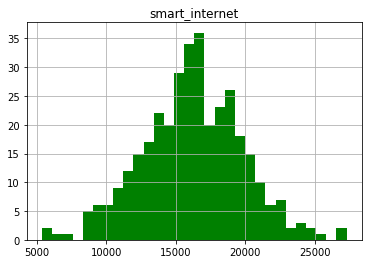

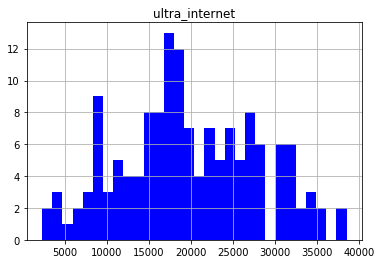

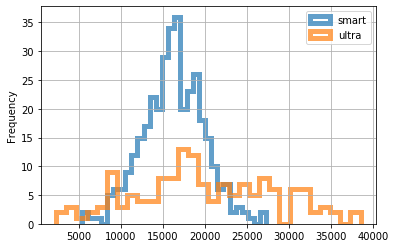

Среднее значение объема потраченного интернет трафика "smart": 16215.684978767253
Дисперсия объема потраченного интернет трафика "smart": 13123645.383587034
Среднее кв. отклонение потраченного интернет трафика "smart": 3617.4783004075703

Среднее значение объема потраченного интернет трафика "ultra": 19743.594459168944
Дисперсия объема потраченного интернет трафика "ultra": 66748286.99601879
Среднее кв. отклонение потраченного интернет трафика "ultra": 8142.126074708867


In [24]:
plt.title('smart_internet')
user_month_internet_sum[user_month_internet_sum['tariff'] == 'smart']['mean_int'].hist(
    bins=30, grid=True, label='smart_internet', color='g'
)
plt.show()
plt.title('ultra_internet')
user_month_internet_sum[user_month_internet_sum['tariff'] == 'ultra']['mean_int'].hist(
    bins=30, grid=True, label='ultra_internet', color='b'
)
plt.show()
ax3 = user_month_internet_sum[user_month_internet_sum['tariff'] == 'smart'].plot(
    kind='hist', histtype='step', bins=30, y='mean_int', label='smart', alpha=0.7, linewidth=5
)
user_month_internet_sum[user_month_internet_sum['tariff'] == 'ultra'].plot(
    kind='hist', histtype='step', bins=30, y='mean_int', label='ultra', ax=ax3, alpha=0.7, linewidth=5,
    grid=True, legend=True
)

plt.show()
print(
    'Среднее значение объема потраченного интернет трафика "smart":',
    user_month_internet_sum[user_month_internet_sum['tariff'] == 'smart']['mean_int'].mean()
)
print(
    'Дисперсия объема потраченного интернет трафика "smart":',
    np.var(user_month_internet_sum[user_month_internet_sum['tariff'] == 'smart']['mean_int'], ddof=1)
)
print(
    'Среднее кв. отклонение потраченного интернет трафика "smart":',
    np.std(user_month_internet_sum[user_month_internet_sum['tariff'] == 'smart']['mean_int'])
)

print()

print(
    'Среднее значение объема потраченного интернет трафика "ultra":',
    user_month_internet_sum[user_month_internet_sum['tariff'] == 'ultra']['mean_int'].mean()
)
print(
    'Дисперсия объема потраченного интернет трафика "ultra":',
    np.var(user_month_internet_sum[user_month_internet_sum['tariff'] == 'ultra']['mean_int'], ddof=1)
)
print(
    'Среднее кв. отклонение потраченного интернет трафика "ultra":',
    np.std(user_month_internet_sum[user_month_internet_sum['tariff'] == 'ultra']['mean_int'])
)

В случае тарифа "smart" среднее значение объема потраченного интернет трафика около 15.8 Гб, в случае тарифа "ultra" - 19.3 Гб, однако среднее отклонение для "smart" - около 3.5 Гб, в случае же тарифа "ultra" - 8 Гб. Диапазон основных значений для тарифа "smart" - [12.3, 19.3] Гб, для тарифа "ultra" - [11.3, 27.3] Гб. То есть граница тариф-пакета "smart" лежит посередине основных значений потраченного интернет трафика, фактически, люди готовы переплатить по 200 рублей за каждый дополнительный Гигабайт, нежели перейти на более дорогой тариф. В тарифе "ultra" значения разбросоны в соответствующем диапазоне и в некоторых случая способны приближаться к критическому значению тариф-пакета. Получается, основной фактор по которому выбирается тариф-пакет - это объем израсходованного интернет-трафика, пользователи, берущие тариф "smart" рассчитывают не переплатить больше денег, чем цена тарифа "ultra", тариф же "ultra" берут люди, которые используют в среднем на 5 Гб больше тариф-пакета "smart", как максимум - на 12 Гб больше, здесь понятно, что лучше взять тариф "ultra".

## Шаг 4. Проверка и анализ гипотез

### Проверка первой гипотезы(средняя выручка пользователей тарифов «Ультра» и «Смарт» различается)

По нашим данным лишь 500 пользователей тарифов - малая выборка большого числа пользователей. Попытаемся судить о генеральной совокупности по этой малой выборки из 500 пользователей. Возьмем уровень значимости в alpha = 1%. Возьмём исходную гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" за альтернативную, тогда напрямую будем проверять насколько средняя выручка по разным тарифам сходится.

In [25]:
smart_avenue = user_month_avenue[user_month_avenue['tariff'] == 'smart']['mean_avenue'].tolist()
ultra_avenue = user_month_avenue[user_month_avenue['tariff'] == 'ultra']['mean_avenue'].tolist()
alpha = 0.0001
results = st.ttest_ind(smart_avenue, ultra_avenue, equal_var=False)
print('p-значение:', results.pvalue)
if (alpha >= results.pvalue):
    print('Первая гипотеза верна с точностью до уровня значимости в 0.01%')
else:
    print('Первая гипотеза неверна с точностью до уровня значимости в 0.01%')

p-значение: 1.1934692265933043e-79
Первая гипотеза верна с точностью до уровня значимости в 0.01%


p-значение имеет порядок 10 в минус 86 степени, то есть на генеральной совокупности шанс того, что объем выручки будет равен ничтожно мал. Оно и ясно, тариф "smart" и сделан для пользователей, которым нужно потратить меньше денег за меньший доступ к минутам/сообщениям/интернет трафиком, а "ultra" - более дорогой вариант для пользователей, которым нужен более обширный доступ.

### Проверка второй гипотезы(средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов)

Возьмём в качестве искомой гипотезы - альтернативную гипотезу гипотезы "средняя выручка пользователей из Москвы схожа с выройучк пользователей из других регионов", тогда нулевая гипотеза должна практически не выполняться. Возьмём порог значимости alpha = 5%. Выборка опять достаточна мала, поэтому узнав поведение данной гипотезы мы сможем оценить поведение и всей генеральной совокупности пользователей.

In [26]:
user_month_avenue['city'] = user_month_avenue['city'].where(user_month_avenue['city'] == 'Москва', 'Другой')
Moscow_avenue = user_month_avenue[user_month_avenue['city'] == 'Москва']['mean_avenue'].tolist()
Other_avenue = user_month_avenue[user_month_avenue['city'] == 'Другой']['mean_avenue'].tolist()
alpha = 0.05
results = st.ttest_ind(Moscow_avenue, Other_avenue, equal_var=False)
print('p-значение:', results.pvalue)
if (alpha >= results.pvalue):
    print('Вторая гипотеза верна с точностью до уровня значимости в 5%')
else:
    print('Вторая гипотеза неверна с точностью до уровня значимости в 5%')

p-значение: 0.45205954559662
Вторая гипотеза неверна с точностью до уровня значимости в 5%


p-значение = 46.5% того, что выручка с пользователей Москвы и других регионов одинакова, что достаточно больше чем установленный порог значимости, а значит разницы между Москвой и остальным регионами для всей генеральной совокупности практически нету. Результат опять-таки совпадает с реальностью, если подумать, то какая разница заплатит человек за интернет с Москвы или с другого региона, регионы, конечно, отличаются по уровню жизни, но не настолько критично, чтобы это влияло на затраты в 550 - 1950 рублей.

## Шаг 5. Общий вывод

Основные значения количества затраченных минут тарифа "smart" находятся в диапазоне - [265, 535] минут, основные значения затраченных минут тарифа "ultra" находятся в диапазоне - [270, 770] минут. То есть количество затраченных минут - не главный фактор выбора тарифа, поскольку даже при использовании сверх пакета пользователи готовы переплатить 3 руб./мин., а в основном, что в тарифе "smart", что в "ultra" пользователям хватает количество минут.

Для количество отправленных сообщений основные значения тарифа "smart" лежат в диапазоне [13, 63] сообщений, значения "ultra" в диапазоне - [22, 108] сообщений, это также означает, что количество отправленных сообщений - не главный фактор выбора тарифа, поскольку пользователи готовы переплатить 3 руб./смс за сообщение в случае сверхтарифной отправки.

Для тарифа "smart" диапазон основных значения объема потраченного интернет трафика - [12.3, 19.3] Гб, для тарифа "ultra" основные значения лежат в диапазоне - [11.3, 27.3] Гб. По этому параметру и происходит выбор тарифа, поскольку среднее значение объема потраченного трафика для тарифа "smart" лежит посередине диапазона, а значит перед выбором пользователь оценивает, что лучше переплатить за сверхтарифный трафик тарифа "smart" или за цену тарифа "ultra", все значения объема интернет трафика которого лежат до критического доступного значения тарифа.

Анализ первой гипотезы привел к оценке в (1 - 6.5 * 10^(-86)%). Эта вероятность настолько близка к единице, что практически ею и является, поэтому шанс того, что генеральная совокупность выручки с пользователей тарифа "smart" различается с генеральной совокупностью выручки с пользователей тарифа "ultra" - практически 100%. Результат также сходится с реальностью, поскольку тариф "ultra" и предназначен для тех, кто хочет большую свободу доступа и соответственно за дополнительную свободу платит больше, чем за более ограниченный и в то же время более дешёвый тариф "smart", в генеральной совокупности пользователей с тарифом "ultra" выручка стремится к цене тарифа - 1950 руб., а в генеральной совокупности пользователей тарифа "smart" выручка стремится к значению немного вышем стоимости пакета - где-то к значению в 500 - 600 руб. Эти значения естественно очень сильно различаются, чтобы называть их схожими.

Анализ второй гипотезы также привел к ожидаемому результату, к оценке в 46.5% того, что выручка с пользователей, проживающих в Москве и пользователей, проживающих в других регионах, приблизительно одинакова, соответственно вероятность того, что выручка будет разной очень мала. Опровержение гипотезы также находит смысл в реальности, регионы не сильно отличаются друг от друга, чтобы уровень жизни не позволял заплатить за тариф от 550 до 1950 рублей, поэтому и выручка с пользователя по регионам отличатся практически не будет.